# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Lakshay Nandwani


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Examine the causes of high cancellations & suggest suitable measures.

Find the shortfalls,if any& recommend remedial measures

Find the untapped business opportunities.

#### **Define Your Business Objective?**

Augment the hospitality business


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [160]:
# Import Libraries
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [161]:
# Load Dataset
hotel =pd.read_csv('Hotel Bookings.csv')


### Dataset First View

In [162]:
# Dataset First Look
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [163]:
# Dataset Rows & Columns count
hotel.shape

(119390, 32)

In [164]:
hotel.iloc[0]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  342
arrival_date_year                         2015
arrival_date_month                        July
arrival_date_week_number                    27
arrival_date_day_of_month                    1
stays_in_weekend_nights                      0
stays_in_week_nights                         0
adults                                       2
children                                   0.0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           C
assigned_room_type                           C
booking_chang

### Dataset Information

In [165]:
# Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [166]:
# Dataset Duplicate Value Count
hotel.duplicated().sum()

31994

In [167]:
# Dropping duplicate columns.
# It is highly unlikely that all column entries of the records match, implying duplicates are present.
hotel=hotel.drop_duplicates()
hotel.shape

(87396, 32)

In [168]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

#### Missing Values/Null Values -- has 2 parts explicit nan & inconsistent or missing values

In [169]:
# Null Values Count -- explicit nan are recognised as .isna by pandas
# Inconsistent data is dealt few cells below

# Creating DataFrame telling percentage null values.
null_values = pd.DataFrame({'null_values' :hotel.isna().sum(),\
                            'percent_null_values' : (hotel.isna().sum()) / (hotel.shape[0]) * (100)})

# Masking to obtain 'pct null values'>0
null_values[null_values['percent_null_values']>0]

,null_values,percent_null_values
children,4,0.004577
country,452,0.517186
agent,12193,13.951439
company,82137,93.982562


<AxesSubplot:>

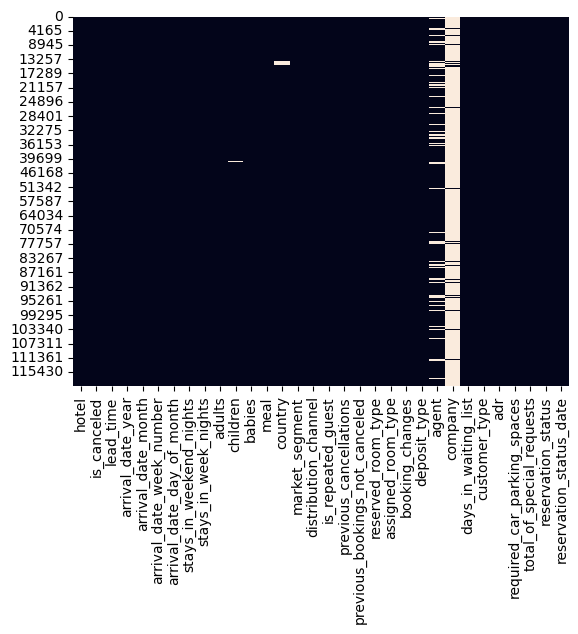

In [170]:
# Visualizing the missing values
sns.heatmap(hotel.isnull(), cbar=False)

# country, company ,agent has null values

In [171]:
# Dealing with NaN

# Incase of null values in agent & company columns, they can be replaced by NA (Not Applicable) as \
# the respective entry may not be applicable. Ex For a 'direct customer', company code is NA or \
# no agent was used


hotel['agent'].replace(np.nan,'NA',inplace=True)
hotel['company'].replace(np.nan,'NA',inplace=True)


In [172]:
# Finding value_counts() of country in desc order
print(hotel['country'].value_counts().sort_values(ascending=False))
mode_country=hotel['country'].mode()[0]     #to extract 'PRT' from Series



# Filling nan of country col mode as difference in mode of country & 2nd most popular country is very high 
# \=PRT (27453)- GBR(10433) & only 452 values need to be filled
hotel['country'].replace(np.nan,mode_country,inplace=True)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
SLE        1
AIA        1
ATF        1
SDN        1
KHM        1
Name: country, Length: 177, dtype: int64


In [173]:
# Assuming nan of children to be 0 as disproportionate guests have 0 children
hotel['children'].replace(np.nan,0,inplace=True)

In [174]:
# Inconsistent data -- can be suspected by seeing whether each column has suitable dtype or not.
# Here reservation_status_date has object dtype , its dtype should be datetime
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [175]:
# Converting to datetime

try:
    hotel['reservation_status_date']=pd.to_datetime(hotel['reservation_status_date'])
    print('Datetime conversion successful')
    
# This col may have inconsistent values like ?
except Exception as e:
    print(e)

Datetime conversion successful


In [176]:
# Creating 'arrival_date' col by concatenating day/month/year from respctive columns
hotel['arrival_date']=hotel['arrival_date_day_of_month'].astype('str')+hotel['arrival_date_month']+hotel['arrival_date_year'].astype('str')

# Converting to datetime
hotel['arrival_date']=pd.to_datetime(hotel['arrival_date'])

# Extracting day name & day number 
hotel['arrival_day_name']=hotel['arrival_date'].dt.day_name()
hotel['week_day']=hotel['arrival_date'].dt.weekday


# Extracting month & month name
hotel['arrival_month']=hotel['arrival_date'].dt.month
hotel['arrival_month_name']=hotel['arrival_date'].dt.month_name()


# Extracting year
hotel['year']=hotel['arrival_date'].dt.year

In [177]:
# 'week_day_classification' col created classifying a particular day as weekday or a weekend

labels=['week_day','weekend']
bins=[-1,4,6] #-1 to include 0 in bins
hotel['week_day_classification']=pd.cut(hotel['week_day'],bins=bins ,labels=labels)

In [178]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  float64       
 11  b

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [179]:
# Dataset Columns
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'arrival_day_name', 'week_day', 'arrival_month', 'arrival_month_name',
       'year', 'week_day_classification'],
      dtype='object')

In [180]:
# Dataset Describe
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,week_day,arrival_month,year
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567,2.979839,6.475663,2016.210296
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946,2.006724,3.097576,0.686102
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,1.000000,2015.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,1.000000,4.000000,2016.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000,3.000000,7.000000,2016.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000,5.000000,9.000000,2017.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,6.000000,12.000000,2017.000000


In [181]:
# min ADR can't be -6.38. Therefore dropping it
hotel[hotel['adr']<0]
hotel=hotel[hotel['adr']>=0]
hotel.shape

(87395, 39)

### Variables Description

hotel: type of hotel -Resort Hotel or City Hotel

is_canceled: A binary value (0 or 1) indicating whether the booking was canceled (0 for not canceled, 1 for canceled).
lead_time: The number of days between the booking date and the arrival date.
arrival_date_year: The year of the arrival date.
arrival_date_month: The month of the arrival date.
arrival_date_week_number: The week number of the arrival date.
arrival_date_day_of_month: The day of of the arrival date.
stays_in_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay

stays_in_week_nights: The number of weekday nights (Monday to Friday) the guest stayed.
adults: Number of adults
children: The number of children
babies: The number of infants
meal: Type of meal booked. 
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)


country: The country of origin of the guest.
market_segment: The market segment categorizing the booking (e.g., Direct).
distribution_channel: The distribution channel through which the booking was made (e.g., Direct).
“TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest:0 for not repeated, 1 for repeated
previous_cancellations: The number of previous bookings that were canceled by the guest.
previous_bookings_not_canceled: The number of previous bookings that were not canceled by the guest.
reserved_room_type: The type of room that was originally reserved.Code
assigned_room_type: The type of room assigned to the guest at check-in.Code

booking_changes: 	Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

deposit_type: Indication on if the customer made a deposit to guarantee the booking.
This variable can assume three categories:
No Deposit – no deposit was made;
Non Refund – a deposit was made in the value of the total stay cost;
Refundable – a deposit was made with a value under the total cost of stay.

agent: The ID of the travel agent associated with the booking (if applicable).


company:	ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

days_in_waiting_list: The number of days the booking was on the waiting list before confirmed.


customer_type:	Type of booking, assuming one of four categories:	
Contract - when the booking has an allotment or other type of contract associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking.


adr: The average daily rate, i.e., the average price per night.
required_car_parking_spaces: The number of car parking spaces required by the guest.
total_of_special_requests: The total number of special requests made by the guest.
reservation_status: Reservation last status, assuming one of three categories:	
Canceled – booking was canceled by the customer;
Check-Out – customer has checked in but already departed;
No-Show – customer did not check-in and did inform the hotel of the reason why


reservation_status_date:	Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel. The date when the reservation status was last updated.

### Check Unique Values for each variable.

In [182]:
# Check Unique Values for each variable.

nunique_df =pd.DataFrame(zip(hotel.columns,\
                             [hotel[col].nunique() for col in hotel.columns.tolist()]),\
                         columns=['Column name','nunique'])


nunique_df

,Column name,nunique
0,hotel,2
1,is_canceled,2
2,lead_time,479
3,arrival_date_year,3
4,arrival_date_month,12
5,arrival_date_week_number,53
6,arrival_date_day_of_month,31
7,stays_in_weekend_nights,17
8,stays_in_week_nights,35
9,adults,14


In [183]:
# Categorical Columns are generally the ones having dtype as object

for col in hotel.describe(include='object'):  # iterating to display unique values of each categorical col
    if hotel[col].nunique()<180:     #to avoid displaying agent id & company id
        print(col)
        print(hotel[col].unique())
        print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

## Outlier Treatment

AxesSubplot(0.125,0.712609;0.227941x0.167391)
AxesSubplot(0.398529,0.712609;0.227941x0.167391)
AxesSubplot(0.672059,0.712609;0.227941x0.167391)
AxesSubplot(0.125,0.511739;0.227941x0.167391)
AxesSubplot(0.398529,0.511739;0.227941x0.167391)
AxesSubplot(0.672059,0.511739;0.227941x0.167391)
AxesSubplot(0.125,0.31087;0.227941x0.167391)
AxesSubplot(0.398529,0.31087;0.227941x0.167391)


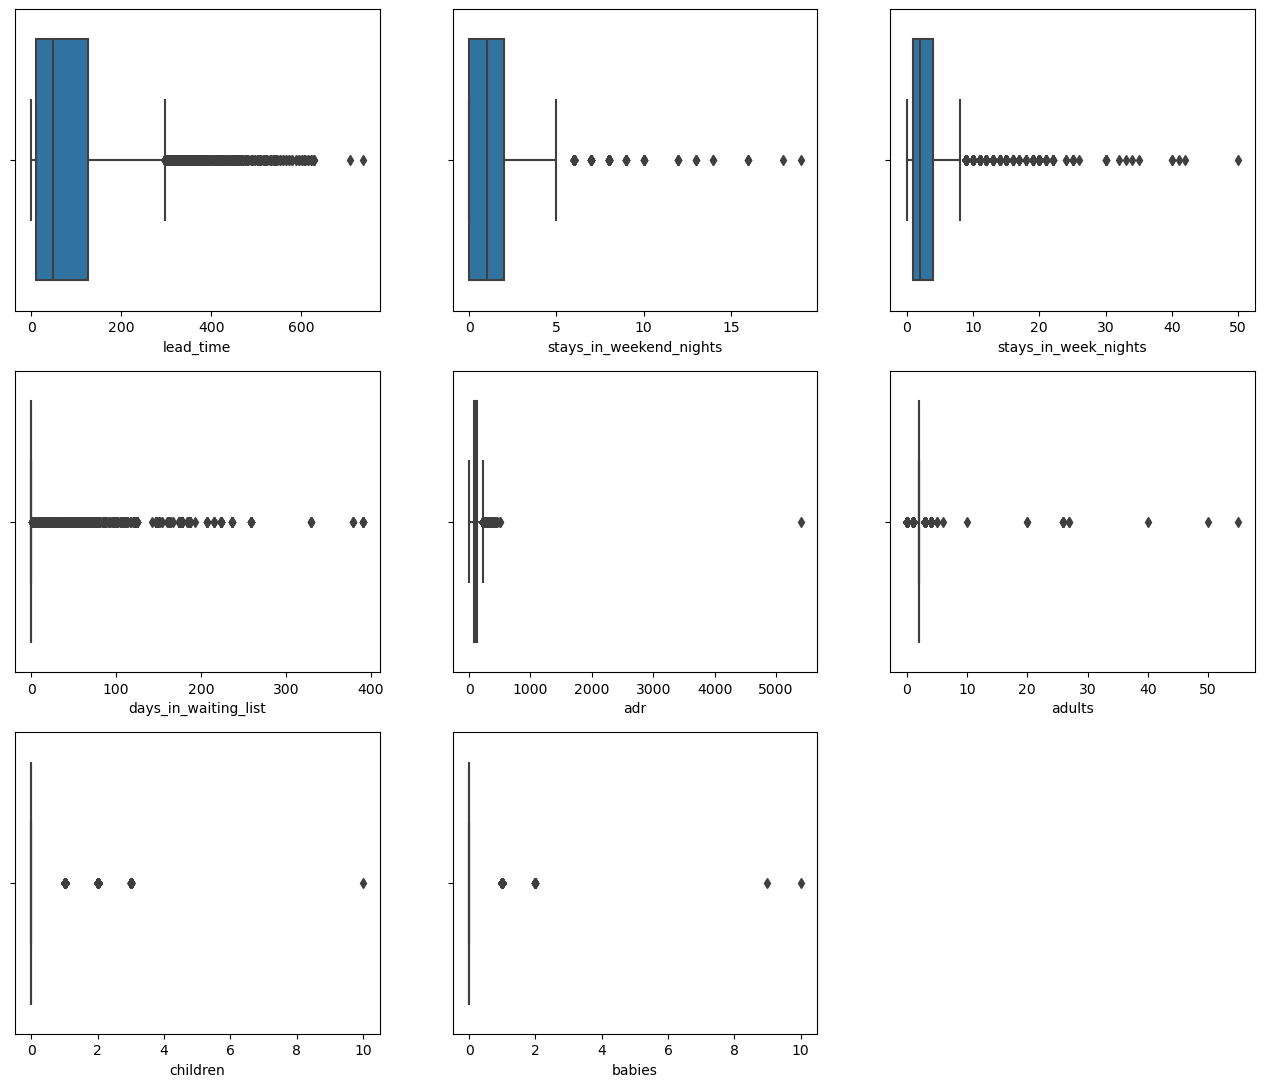

In [184]:
# Handpicking columns in which outliers may be present

posssible_outliers =['lead_time','stays_in_weekend_nights','stays_in_week_nights','days_in_waiting_list','adr','adults','children','babies']
plt.figure(figsize=(16,18))
n=1
for col in posssible_outliers:
    plt.subplot(4,3,n)
    print(sns.boxplot(data=hotel,x=col))
    n+=1
    
# plt.savefig('outlier.jpg')
plt.show()
#     plt.tight_layout()

In [185]:
hotel.shape

(87395, 39)

<AxesSubplot:xlabel='hotel', ylabel='adr'>

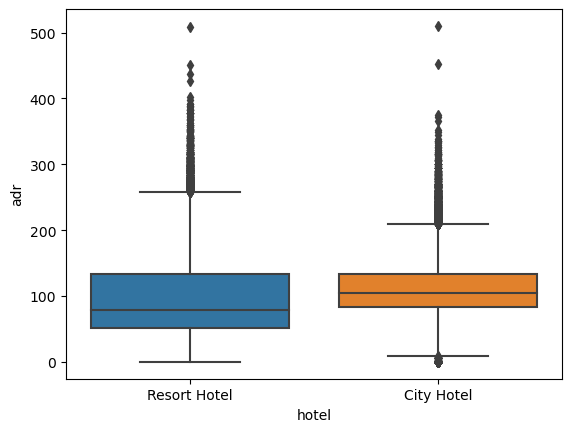

In [186]:
# can find from describe col min max values
# 'adr' one outlier 5000

hotel=hotel[hotel['adr']<5000]
# df=df[df['babies']<5]
# df=df[df['children']<5]


sns.boxplot(data=hotel,y='adr',x='hotel')
# Observation -- in City Hotel some points have adr =0


In [187]:
adr_0=hotel[hotel['adr']==0]
adr_0

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_day_name,week_day,arrival_month,arrival_month_name,year,week_day_classification
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,2015-07-01,Wednesday,2,7,July,2015,week_day
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,2015-07-01,Wednesday,2,7,July,2015,week_day
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,1,Check-Out,2015-07-05,2015-07-04,Saturday,5,7,July,2015,weekend
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,...,2,Check-Out,2015-07-06,2015-07-06,Monday,0,7,July,2015,week_day
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,...,0,Check-Out,2015-07-06,2015-07-06,Monday,0,7,July,2015,week_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,0,1,...,0,Check-Out,2017-08-23,2017-08-23,Wednesday,2,8,August,2017,week_day
118762,City Hotel,0,1,2017,August,34,24,0,1,2,...,3,Check-Out,2017-08-25,2017-08-24,Thursday,3,8,August,2017,week_day
118963,City Hotel,0,1,2017,August,35,27,0,0,2,...,0,Check-Out,2017-08-27,2017-08-27,Sunday,6,8,August,2017,weekend
119102,City Hotel,0,518,2017,August,34,26,2,1,1,...,0,Check-Out,2017-08-29,2017-08-26,Saturday,5,8,August,2017,weekend


In [188]:
# In adult boxplot some points are at 0 , which is not possible as number of guests cant be equal to 0 .\
# Therefore,removing such entries

adult_0_filter=hotel['adults']==0
hotel=hotel[~adult_0_filter]      #Overwriting hotel by extracting rows where number of adults is not 0
hotel.shape

(87009, 39)

In [189]:
# Other outliers will be treated separately

## 3. ***Data Wrangling***

### Data Wrangling Code

## Tops & Bottoms -- Below few cells will depict 1st & last for various columns

In [190]:
# Write your code to make your dataset analysis ready.

# Cancelled & not cancelled data points will be analysed separately in some scenarios
cancelled_df=hotel[hotel['is_canceled']==1]
not_cancelled_df=hotel[hotel['is_canceled']==0]

<AxesSubplot:ylabel='hotel'>

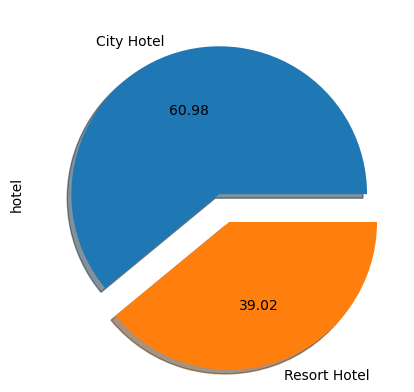

In [191]:
# Q Distribution of bookings bw hotels

hotel['hotel'].value_counts(normalize=True).plot(kind='pie',autopct="%.2f",explode=(0,0.2),shadow=True)
# Percentage booking in City hotel is more compared to Resort hotel.

In [210]:
# Q From which country maximum bookings come?

# Groupby country
country_visitors=hotel.groupby('country').size()
country_visitors=country_visitors.sort_values(ascending=False)

# Filtering those countries where guest count >2000
country_visitors=country_visitors[hotel['country'].value_counts()>2000]
country_visitors=country_visitors.reset_index(name = 'count')


# Making a geomap
px.choropleth(country_visitors,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale="Viridis_r",
                    title="Home country of visitors")
# plt.savefig('map.jpg')
# plt.show()

# maximum bookings come from PRT /Portugal ,followed by GBR Great Britain

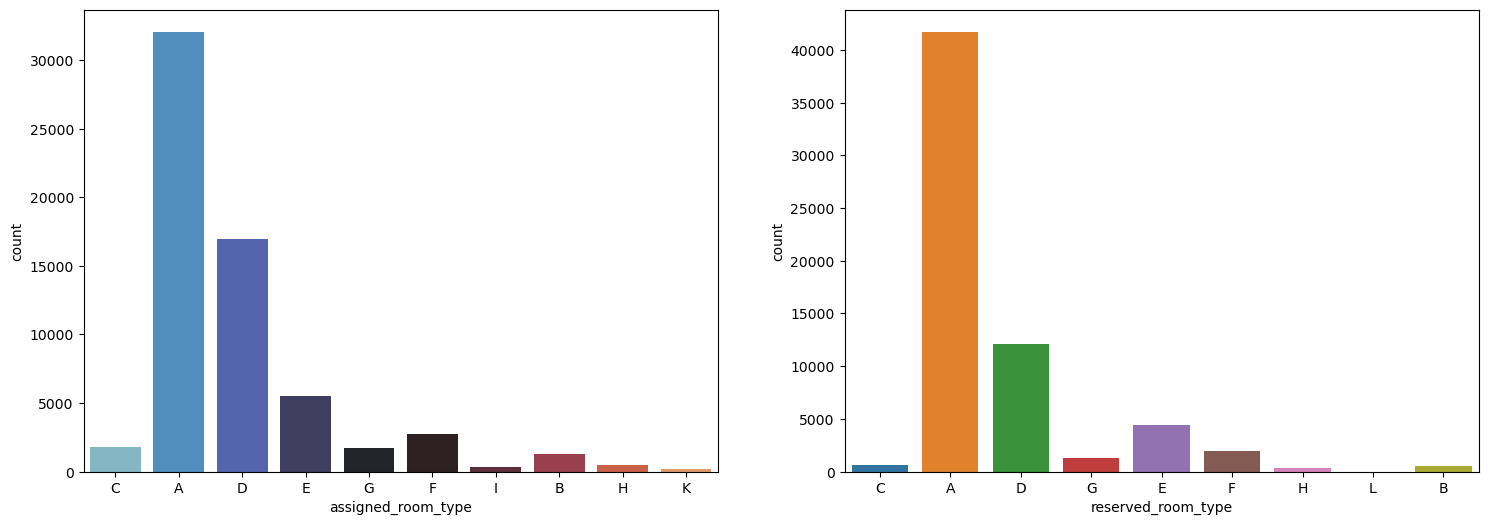

In [271]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(data=not_cancelled_df,x='assigned_room_type',palette='icefire')

plt.subplot(1,2,2)
sns.countplot(data=not_cancelled_df,x='reserved_room_type')

plt.show()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 -Comparison of monthwise potential,realised & lost ADR

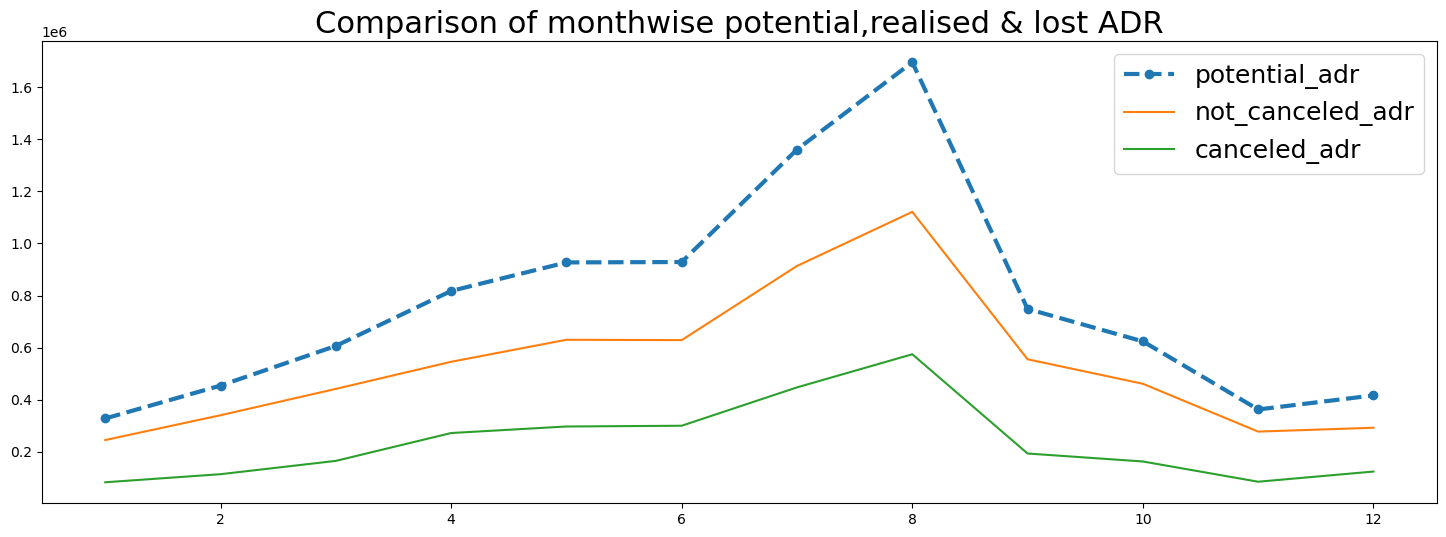

In [250]:
# Chart - 1 visualization code
plt.figure(figsize=(18,6))

# Grouping by month 
month_grouped_df_not_cancelled =not_cancelled_df.groupby('arrival_month')
month_grouped_df_cancelled =cancelled_df.groupby('arrival_month')
month_grouped_df_potential =hotel.groupby('arrival_month')


# Plotting data
plt.plot(month_grouped_df_potential['adr'].sum(),marker='o',linestyle='dashed',linewidth=3,\
         label='potential_adr')
plt.plot(month_grouped_df_not_cancelled['adr'].sum(),label='not_canceled_adr')
plt.plot(month_grouped_df_cancelled['adr'].sum(),label='canceled_adr')



# Plot formatting
plt.legend(fontsize=18)
plt.title('Comparison of monthwise potential,realised & lost ADR',fontsize=22)
# plt.savefig('1.jpg')
plt.show()


##### 1. Why did you pick the specific chart?

Line chart can depict & compare monthwise

 1. sum of realised average daily rate (ADR),

 2. loss of ADR due to cancellations

 3. and potential ADR if cancellations' ADR was also realised

##### 2. What is/are the insight(s) found from the chart?

In [213]:
# Calculating sum of respective ADRs
lost_adr=sum(month_grouped_df_cancelled['adr'].sum())
realised_adr =sum(month_grouped_df_not_cancelled['adr'].sum())
potential_adr=sum(month_grouped_df_potential['adr'].sum())

# % loss
print(f'{int(lost_adr/potential_adr*100)}% ADR loss incurred due to cancellations in given time period ')


30% ADR loss incurred due to cancellations in given time period 


30% ADR loss incurred due to cancellations in given time period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

30% loss in ADR is a very high number. Therefore,analysis of cancellations is done below to suggest measures for reducing cancellations

#### Chart - 2 -- Cancellations hoteltypewise

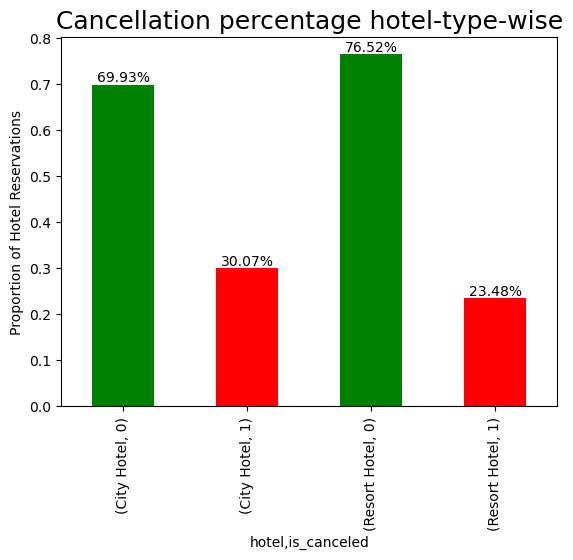

In [258]:
# Chart - 2 visualization code
# Cancellations hoteltypewise

# Grouping by hotel
plot_2=hotel.groupby(by='hotel')['is_canceled'].value_counts(normalize=True)\
.plot(kind='bar',color=['g','r'])


# For printing percentages on the chart
for p in plot_2.patches:
      height = p.get_height()
      plot_2.annotate(f'{height*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
             ha='center', va='center', xytext=(0, 5), textcoords='offset points'
              )

    
plt.ylabel('Proportion of Hotel Reservations')
# plt.savefig('3.jpg')
plt.title('Cancellation percentage hotel-type-wise',fontsize=18)
plt.show()


##### 1. Why did you pick the specific chart?

Grouped Bar chart can best depict all 4 combinations of hotel types(2) & is_canceled(2)

##### 2. What is/are the insight(s) found from the chart?

In [218]:
# Higher cancellation percentage in City Hotel
pd.crosstab(hotel['is_canceled'],hotel['hotel'],normalize='columns')*100

hotel,City Hotel,Resort Hotel
is_canceled,,
0,69.930637,76.515977
1,30.069363,23.484023


1. City hotel has 30% cancellations
2. 15% can be considered normal.More than 15% is a loss to hotel in terms of lost opportunity cost due to less occupancy

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Require further investigation

#### Chart - 3 --KDE of ADR

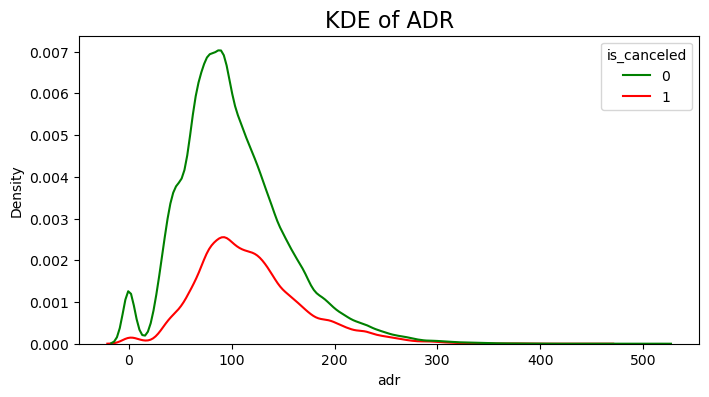

In [261]:
# Chart - 3 visualization code

# Hypothesis-- High ADR/price leads to increased cancellations.
plt.figure(figsize=(8,4))
sns.kdeplot(data=hotel,hue='is_canceled',x='adr',palette=['green','red'])
# plt.savefig('4.png')
plt.title("KDE of ADR",fontsize=16)
plt.show()


# From plot
# ADR has no effect on cancellations
# Both green and red plot have highest probability density near adr 100.
# When ADR is 0 ,then also there are cancellations

##### 1. Why did you pick the specific chart?

Kernel Density Estimation shows probability distribution at various ADRs for both cancelled & not cancelled

##### 2. What is/are the insight(s) found from the chart?

1. Contrary to hypothesis ,ADR has no effect on cancellations
2. Both green and red lines have highest probability density near adr 100.
3. When ADR is 0 ,then also there are cancellations

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

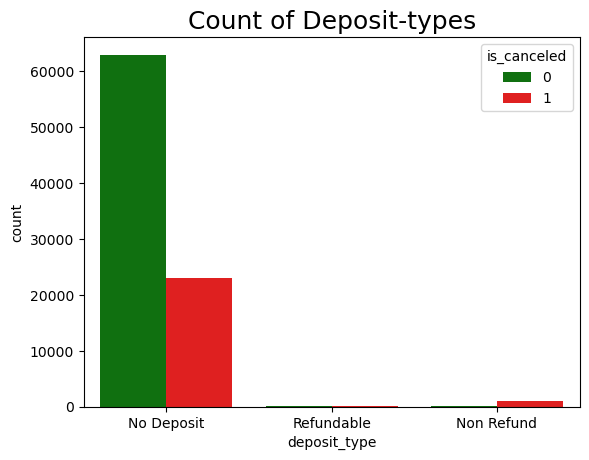

In [263]:
# Chart - 4 visualization code

# Hypothesis--Higher cancellation rates seen in case of no deposit bookings ie when 
# advance payment is not made

sns.countplot(data=hotel,x='deposit_type',hue='is_canceled',palette=['green','red'])
plt.title("Count of Deposit-types",fontsize=18)
plt.show()
# plt.savefig('5.png')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [267]:
hotel.groupby(['deposit_type'])['is_canceled'].value_counts(normalize=True)*100

deposit_type  is_canceled
No Deposit    0              73.308100
              1              26.691900
Non Refund    1              94.696239
              0               5.303761
Refundable    0              75.700935
              1              24.299065
Name: is_canceled, dtype: float64

1. A no deposit & refundable booking has approx 25% chance of cancellation
2. In cases when the advance is non-refundable only 5% cancellations were observed. But non-refundable bookings are less in number in absolute terms

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 5

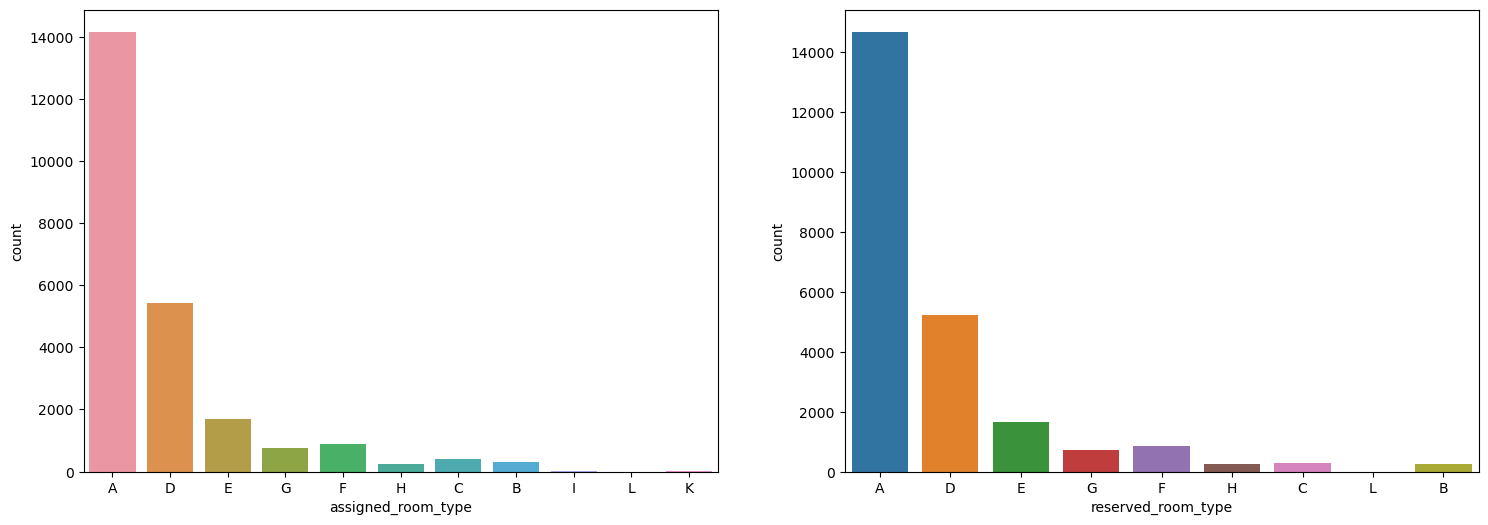

In [236]:
# Chart - 5 visualization code
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(data=cancelled_df,x='assigned_room_type')

plt.subplot(1,2,2)
sns.countplot(data=cancelled_df,x='reserved_room_type')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. 'A'type room has highest cancellations

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<AxesSubplot:xlabel='count', ylabel='customer_type'>

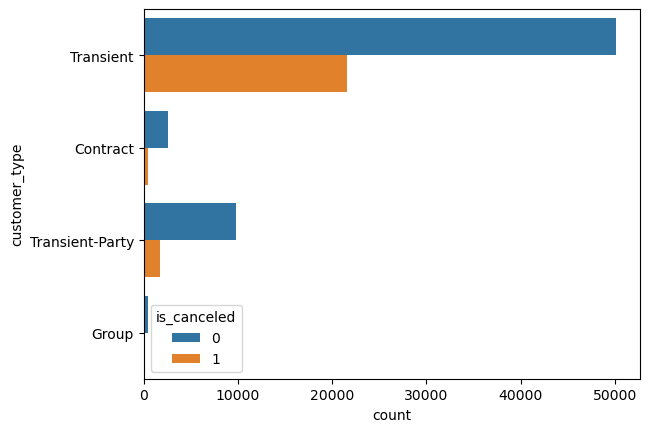

In [234]:
# Chart - 6 visualization code
sns.countplot(data=hotel,y='customer_type',hue='is_canceled')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

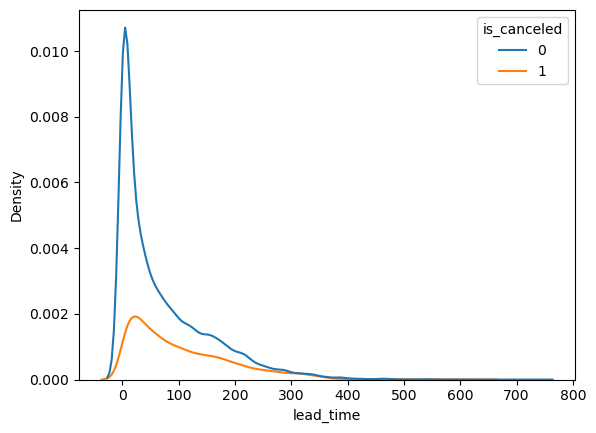

In [237]:
# Chart - 7 visualization code
sns.kdeplot(data=hotel,x='lead_time',hue='is_canceled')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

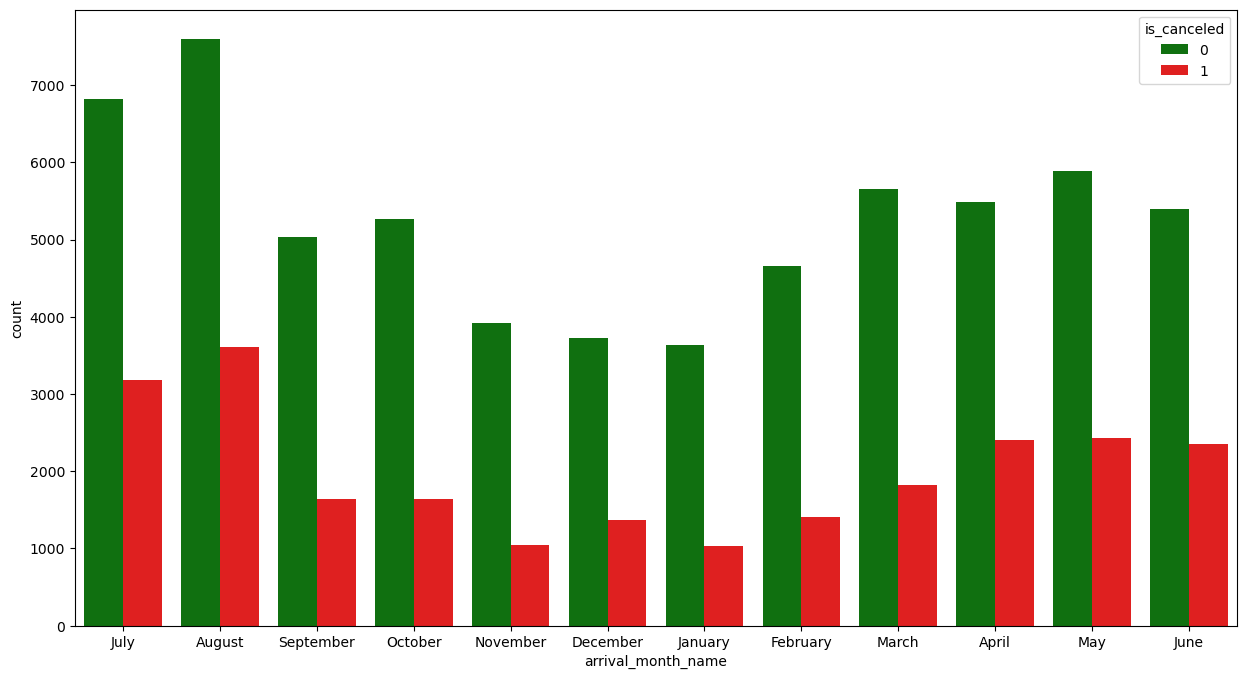

is_canceled                 0          1
arrival_month_name                      
April               69.564666  30.435334
August              67.787690  32.212310
December            73.118491  26.881509
February            76.817807  23.182193
January             77.865867  22.134133
July                68.165018  31.834982
June                69.657844  30.342156
March               75.665908  24.334092
May                 70.764798  29.235202
November            78.920878  21.079122
October             76.249095  23.750905
September           75.505921  24.494079 



is_canceled,0,1
arrival_month_name,,
August,67.78769,32.21231


In [238]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
hotel['month'] = hotel['reservation_status_date'].dt.month
sns.countplot(data=hotel,x='arrival_month_name',hue='is_canceled',palette=['g','r'])
plt.savefig('monthwise_cancellations.jpg')
plt.show()


mnt_cncl = pd.crosstab(hotel['arrival_month_name'],hotel['is_canceled'],normalize='index')*100
# normalize='index'--to calculate percentage over each row
print(mnt_cncl,'\n')
# Finding max cancellation month
mnt_cncl[mnt_cncl[1]==max(mnt_cncl[1])]
# percentage cancellation

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<AxesSubplot:xlabel='month', ylabel='adr'>

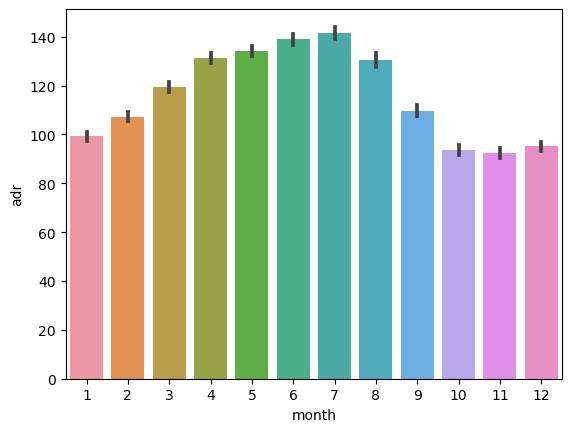

In [239]:
# Chart - 9 visualization code
# sort_values?
cancelled_df['month']=cancelled_df['reservation_status_date'].dt.month
sns.barplot(x='month',y='adr',data =cancelled_df) #adr along y-axis is mean adr of the month

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

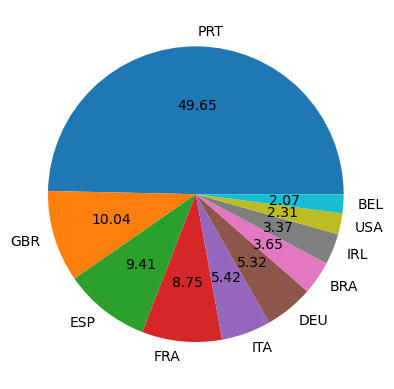

In [241]:
# Chart - 10 visualization code
# Finding guests from which country cancel more often.

top_10_country_canceled = cancelled_df['country'].value_counts()[:10]

# type(top_10_country_canceled)
plt.pie(top_10_country_canceled,labels=top_10_country_canceled.index,autopct='%.2f')
# plt.savefig('countrywise_cancellations.jpg')
plt.show()

# Obs
# 1. PRT ie Portugal country's guests has disproportionate cancellations greater than combined

# Recomm
# 1. Increase facilities
# promotional discount,advt
# improve facilities

# cashback while booking
#   or charges  

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<AxesSubplot:ylabel='market_segment'>

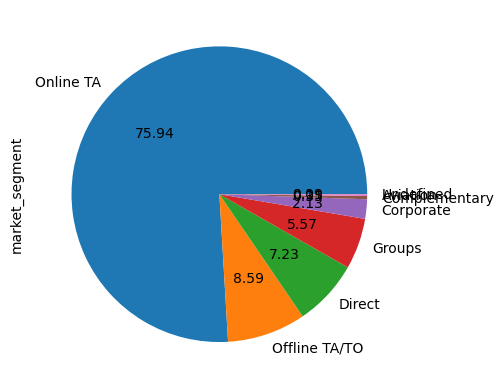

In [243]:
# Chart - 11 visualization code
cancelled_df['market_segment'].value_counts().plot(kind='pie',autopct='%.2f')
# plt.savefig('market_segment_cancellations.jpg')

# Online TAs 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [244]:
pd.crosstab(hotel['market_segment'],hotel['is_canceled'],normalize='index')*100

is_canceled,0,1
market_segment,,
Aviation,80.088496,19.911504
Complementary,87.790698,12.209302
Corporate,87.880952,12.119048
Direct,85.277849,14.722151
Groups,72.932331,27.067669
Offline TA/TO,85.163526,14.836474
Online TA,64.629161,35.370839
Undefined,0.000000,100.000000


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [206]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [207]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [208]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [209]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***